In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy as sp
from pymc3.gp.util import plot_gp_dist

%matplotlib inline


In [5]:
def sample(stepsize, algorithm='Gaussian', n_samples=1000, flags="", log=''):
    cmd = !echo "sample --algorithm $algorithm --stepsize $stepsize -n $n_samples -f ../../models/Spiralus.fml --compute-esjd --overwrite $flags"
    log = !sample --algorithm $algorithm --stepsize $stepsize -n $n_samples -f ../../models/Spiralus.fml --compute-esjd --overwrite $flags
    print(cmd[0])

def get_esjd():
    score = !cat output/statistics/statistics_esjd.csv
    score = score[0].split(',')
    score = [float(x) for x in score]
    return np.array(score)
    
def get_psrf():
    try:
        psrf = !cat output/statistics/statistics_psrf.csv
        psrf = psrf[0].split(',')
        psrf = [float(x) for x in psrf]
    except:
        psrf = np.nan
    return np.array(psrf)
    
def get_last_point():
    last_point = !tail -n 1 output/chain0/chain0_states.csv
    return last_point[0]


In [11]:
a = 0.02
b = 0.2
n = 100

n_samples = 10000
repetitions = 1

stepsizes = np.linspace(np.log(a), np.log(b), n)
esjds = []
count = []

for stepsize in stepsizes:
    count.append(0)
    _esjds = []
    
    for i in range(repetitions):
        sample(np.exp(stepsize), n_samples=n_samples, flags='--compute-psrf -x 0.6 1 --seed ' + str(i))
        psrf = np.max(get_psrf())
        #psrfs.append(psrf)
        if psrf < 1.05:
            _esjds.append(np.min(get_esjd()))
            count[-1] = count[-1] + 1
            
    esjds.append(np.mean(_esjds))
    


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
optimal stepsize 0.07888412118875313
in log space     -2.5397753237448257


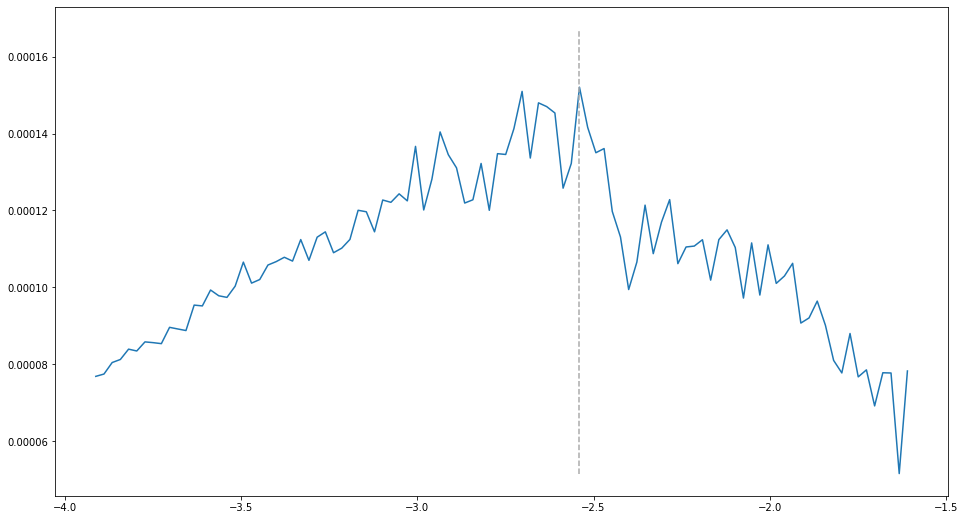

In [12]:
fig, (ax) = plt.subplots(1, 1, figsize=(16,9))

max_esjd = esjds[np.argmax(esjds)]
min_esjd = esjds[np.argmin(esjds)]
max_stepsize = stepsizes[np.argmax(esjds)]

ax.plot(stepsizes, esjds)
ax.plot([max_stepsize, max_stepsize], [min_esjd, max_esjd*1.1], linestyle='dashed', color='#aaa')

print(count)
print("optimal stepsize", np.exp(max_stepsize))
print("in log space    ", max_stepsize)

In [6]:
initial_starting_point = "0.6,1"
starting_point = None

def f(x, n_samples=1000): 
    global starting_point
    if starting_point is not None:
        last_point = get_last_point()
        starting_point = last_point
    else:
        starting_point = initial_starting_point
    
    sample(np.exp(x), n_samples=n_samples, flags="-c 2 -x " + starting_point.replace(',', ' '))
    return np.min(get_esjd())


1 / 10
sample --algorithm Gaussian --stepsize 0.27185882427329416 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.6 1


/home/rpaul/.local/lib/python3.8/site-packages/aesara/graph/fg.py:525: UserWarning: Variable Elemwise{add,no_inplace}.0 cannot be replaced; it isn't in the FunctionGraph
  warnings.warn(


2 / 10
sample --algorithm Gaussian --stepsize 0.026560877829466874 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.59999999999999998 1


3 / 10
sample --algorithm Gaussian --stepsize 0.13530477745798072 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.57165320610042192 0.94931266461757713


4 / 10
sample --algorithm Gaussian --stepsize 0.8302175681319743 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.56522512924692658 0.9408256511691756


5 / 10
sample --algorithm Gaussian --stepsize 0.07742636826811271 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.56522512924692658 0.9408256511691756


6 / 10
sample --algorithm Gaussian --stepsize 0.046415888336127815 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.58025032071417137 0.969800102039579


7 / 10
sample --algorithm Gaussian --stepsize 0.010476157527896655 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.56409992649858487 0.9328947087800008


8 / 10
sample --algorithm Gaussian --stepsize 0.01830738280295369 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.5530736355685214 0.92405545146988088


9 / 10
sample --algorithm Gaussian --stepsize 0.03678379771828634 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.57980675148620886 0.98112908099911755


10 / 10
sample --algorithm Gaussian --stepsize 0.0890215085445039 -n 1000 -f ../../models/Spiralus.fml --compute-esjd --overwrite -c 2 -x 0.55142098782941029 0.91206845971125516


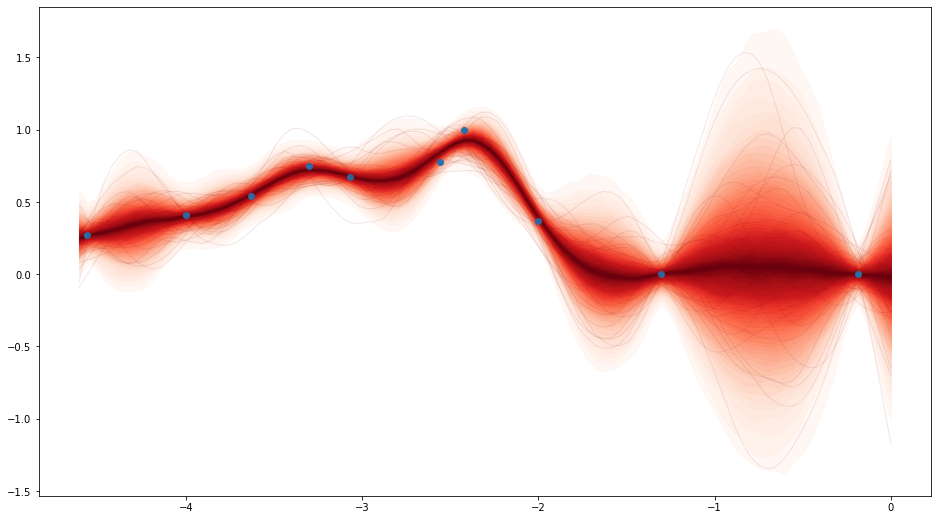

In [14]:
initial_starting_point = "0.6,1"
starting_point = None

a = 0.01
b = 1
n = 100

n_samples = 1000

log_stepsizes = np.linspace(np.log(a), np.log(b), n)
#print(log_stepsizes)
x = log_stepsizes[int(np.random.uniform(n))]

y = []
X = []

N_rounds = 10

for n in range(N_rounds):
    print((n+1), "/", N_rounds)
    X.append(x)
    y.append(f(x, n_samples))
    
    #print(np.array(X)[:,None])
    #print(np.array(y))
    
    with pm.Model() as model:
        #iota = pm.Gamma("iota", alpha=2, beta=1)
        #eta = pm.HalfCauchy("eta", beta=5)
        
        iota = 1
        eta = 2

        cov = eta ** 2 * pm.gp.cov.Matern52(1, iota)
        gp = pm.gp.Marginal(cov_func=cov)

        sigma = pm.HalfCauchy("sigma", beta=5)
        _y = np.array(y)/np.max(y) if np.max(y) != 0 else np.array(y)
        y_ = gp.marginal_likelihood("y", X=np.array(X)[:, None], y=_y, noise=sigma)

        mp = pm.find_MAP()
        
    # add the GP conditional to the model, given the new X values
    with model:
        f_pred = gp.conditional("f_pred", log_stepsizes[:, None])

    # To use the MAP values, you can just replace the trace with a length-1 list with `mp`
    with model:
        pred_samples = pm.sample_posterior_predictive([mp], var_names=["f_pred"], samples=1)
     
    k = np.argmax(pred_samples['f_pred'][0])
    x = log_stepsizes[k]
    
    if n == N_rounds-1:
        with model:
            pred_samples = pm.sample_posterior_predictive([mp], var_names=["f_pred"], samples=1000)
        fig = plt.figure(figsize=(16,9))
        ax = fig.gca()
        plot_gp_dist(ax, pred_samples["f_pred"], log_stepsizes[:,None])
        #plt.plot(log_stepsizes, pred_samples['f_pred'][0])
        #ax.plot([np.log(max_stepsize), np.log(max_stepsize)], ax.get_ylim(), linestyle='dashed', color='#aaa')
        _y = np.array(y)/np.max(y) if np.max(y) != 0 else np.array(y)
        plt.scatter(X, _y)
        plt.show()

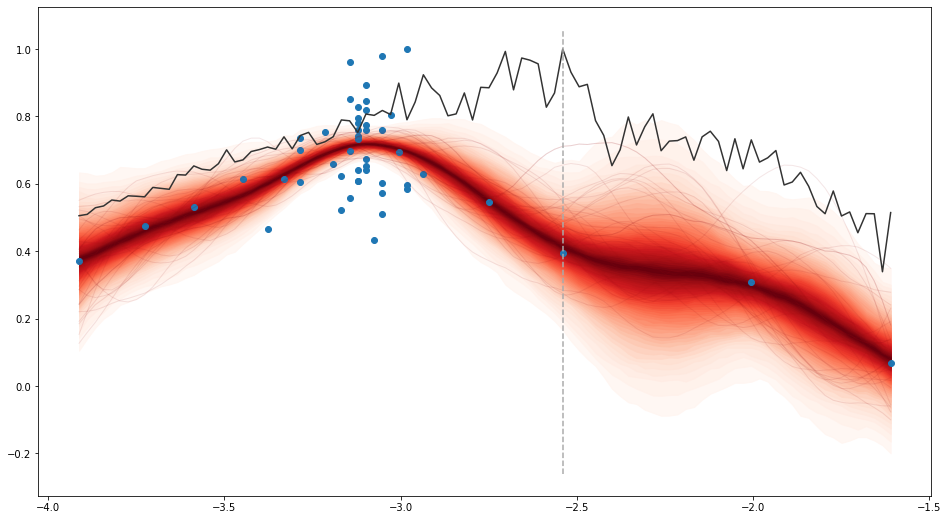

In [43]:
fig = plt.figure(figsize=(16,9))
ax = fig.gca()
plot_gp_dist(ax, pred_samples["f_pred"], log_stepsizes[:,None])

ax.plot(stepsizes, esjds/np.max(esjds), color='#333')
ax.plot([max_stepsize, max_stepsize], ax.get_ylim(), linestyle='dashed', color='#aaa')

_y = np.array(y)/np.max(y) if np.max(y) != 0 else np.array(y)
ax.scatter(X, _y)
plt.show()
        

In [2]:
import hopsy as hp
import numpy as np

In [ ]:
mu = np.zeros((2,1))
cov = np.identity(2)

A = np.array([[1, -1], [-1, 0], [0, 1]])
b = np.array([[0], [0], [1000]])

model = hp.MultivariateGaussianModel(mu, cov)
problem = hp.Problem(A, b, model)
run = hp.Run(problem)

#def g(x, run, n_samples=1000):
#    run.get_data().reset()
#    run.set_stepsize(x)
#    run.sample(n_samples)
#    run.get_data().compute_expected_squared_jump_distance()
#    return run.get_data().get_statistics().get_expected_squared_jump_distance()

stepsize = 1
n_samples = 1000

#run.get_data().reset()
#run.set_stepsize(stepsize)
run.sample(n_samples)
#run.get_data().compute_expected_squared_jump_distance()
#run.get_data().get_statistics().get_expected_squared_jump_distance()


(100, 1)
(100,)


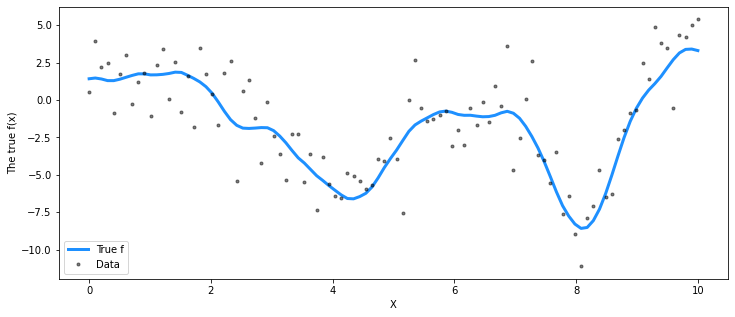

In [47]:
initial_starting_point = "0.6,1"
starting_point = None

a = 0.02
b = 0.2
n = 100

n_samples = 1000

log_stepsizes = np.linspace(np.log(a), np.log(b), n)
#print(log_stepsizes)
x = log_stepsizes[int(np.random.uniform(n))]

y = []
X = []

N_rounds = 50

for n in range(N_rounds):
    print((n+1), "/", N_rounds)
    X.append(x)
    y.append(f(x, n_samples))
    print(x, y[-1])
    
    #print(np.array(X)[:,None])
    #print(np.array(y))
    
    with pm.Model() as model:
        #iota = pm.Gamma("iota", alpha=2, beta=1)
        #eta = pm.HalfCauchy("eta", beta=5)
        
        iota = 1
        eta = 1

        cov = eta ** 2 * pm.gp.cov.Matern52(1, iota)
        gp = pm.gp.Marginal(cov_func=cov)

        sigma = pm.HalfCauchy("sigma", beta=5)
        _y = np.array(y)/np.max(y) if np.max(y) != 0 else np.array(y)
        y_ = gp.marginal_likelihood("y", X=np.array(X)[:, None], y=_y, noise=sigma)

        mp = pm.find_MAP()
        
    # add the GP conditional to the model, given the new X values
    with model:
        f_pred = gp.conditional("f_pred", log_stepsizes[:, None])

    # To use the MAP values, you can just replace the trace with a length-1 list with `mp`
    with model:
        pred_samples = pm.sample_posterior_predictive([mp], var_names=["f_pred"], samples=1)
     
    k = np.argmax(pred_samples['f_pred'][0])
    x = log_stepsizes[k]
    
    if n == N_rounds-1:
        with model:
            pred_samples = pm.sample_posterior_predictive([mp], var_names=["f_pred"], samples=1000)
        fig = plt.figure(figsize=(16,9))
        ax = fig.gca()
        plot_gp_dist(ax, pred_samples["f_pred"], log_stepsizes[:,None])
        #plt.plot(log_stepsizes, pred_samples['f_pred'][0])
        #ax.plot([np.log(max_stepsize), np.log(max_stepsize)], ax.get_ylim(), linestyle='dashed', color='#aaa')
        _y = np.array(y)/np.max(y) if np.max(y) != 0 else np.array(y)
        plt.scatter(X, _y)
        plt.show()